## Shanice Bailey
# CryoSat-2: Dynamic Topography of Southern Ocean

My Binder link: https://hub.mybinder.org/user/stb2145-rces-finalproject-mb7ozrhw/tree

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from glob import glob
import xarray as xr
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature

In [ ]:
! wget http://rkwok.jpl.nasa.gov/rgpsftp/cryosat2_topo/CS2_combined_Southern_Ocean_2011-2016.nc

In [2]:
cs2 = 'CS2_combined_Southern_Ocean_2011-2016.nc'
ds = xr.open_dataset(cs2, decode_times=False)
ds = ds.set_coords(['Latitude', 'Longitude', 'Area'])
ds

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Data variables:
    DOT        (date, Y, X) float32 ...
    SLA        (date, Y, X) float32 ...
    MDT        (Y, X) float32 ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereographic grid (https:/...
    Reference:    Armitage et al., Dynamic topography and sea level anomalies...

In [3]:
#checking projection type
ds.attrs['Projection:']

'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'

In [4]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

In [5]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [6]:
ccrs.Stereographic?

Init signature: ccrs.Stereographic(central_latitude=0.0, central_longitude=0.0, false_easting=0.0, false_northing=0.0, true_scale_latitude=None, scale_factor=None, globe=None)
Docstring:     
Define a projected coordinate system with flat topology and Euclidean
distance.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           /opt/conda/lib/python3.6/site-packages/cartopy/crs.py
Type:           ABCMeta


In [7]:
#Changing X & Y from km to m
ds_scaled = ds.copy()
ds_scaled['X'] = ds['X'] * 1000
ds_scaled['Y'] = ds['Y'] * 1000
# how to change unit names from km to m

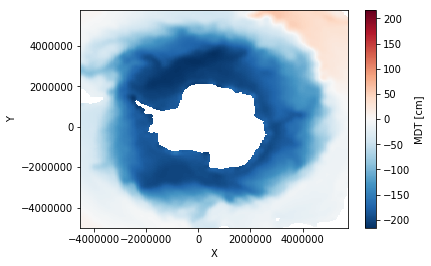

In [8]:
ds_scaled.MDT.plot()

In [9]:
#.values.item()?
# is this value from Latitude value itself or is it of Y?
#trying to find center point of each coord
center_point = {'X':len(ds.X)//2, 'Y':len(ds.Y)//2}
center_lat = ds.Latitude.isel(**center_point).values.item()
center_lat

-83.2791519165039

Text(0.5,1,'Using stereographic proj instead of SouthPolar')

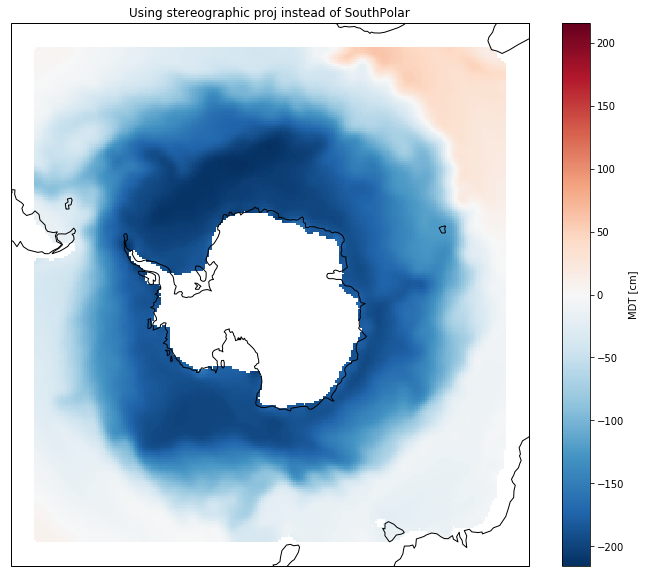

In [10]:
proj = ccrs.Stereographic(central_longitude=0, central_latitude=center_lat, false_northing=8e5)

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=proj)
ax.coastlines()
ds_scaled.MDT.plot()
plt.title('Using stereographic proj instead of SouthPolar')
#ax.add_feature(cfeature.LAND, facecolor='0.9', edgecolor='k')

Text(0.5,1,'Using Pcolormesh')

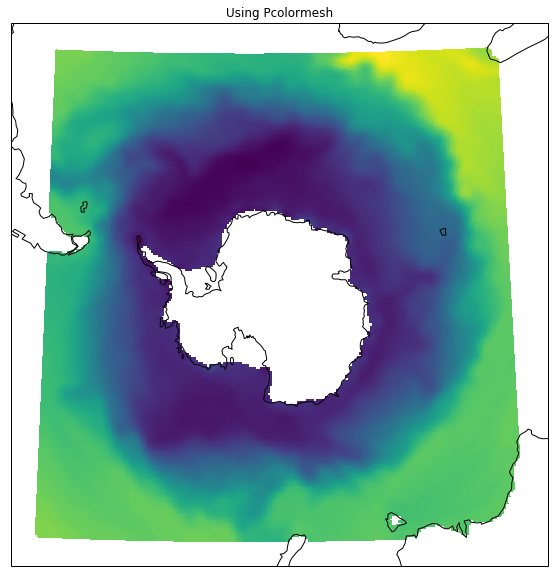

In [11]:
plt.figure(figsize=(12,10))

ax = plt.axes(projection=proj)
ax.coastlines()
ax.pcolormesh(ds_scaled.Longitude, ds_scaled.Latitude, ds_scaled.MDT, transform=ccrs.PlateCarree())
plt.title('Using Pcolormesh')

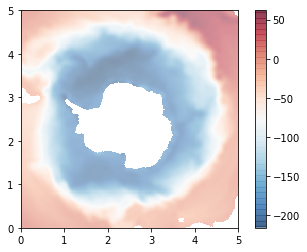

In [12]:
contours = plt.contour(ds.Longitude, ds.Latitude, ds.MDT, levels=20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(ds.MDT, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdBu_r', alpha=0.5)
plt.colorbar();

## Figure 4a)

In [13]:
#ds.Longitude.plot()

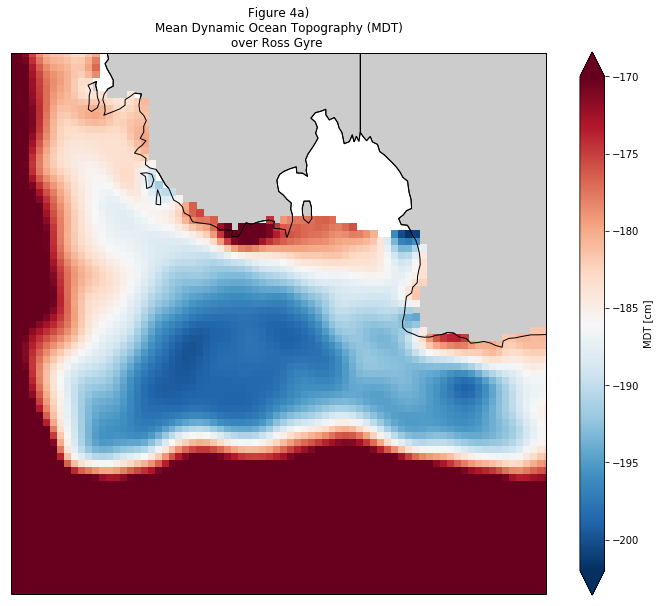

In [14]:
extent = [-200,-140,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ds.MDT.plot(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(),cmap='RdBu_r', vmin=-202, vmax=-170)
plt.title('Figure 4a)\nMean Dynamic Ocean Topography (MDT)\nover Ross Gyre ');

>**Figure 4a).** Seasonal variability of the Ross Gyre: the mean dynamic ocean topography (cm) over the period of 2011-2016, the color scale is purposefully saturated to highlight the Ross Gyre. There is a dip in the cyclonic gyre.

## Figure 5a)

Text(0.5,1,'Figure 5a\nMean Dynamic Ocean Topography (MDT)\nover Weddell Gyre)')

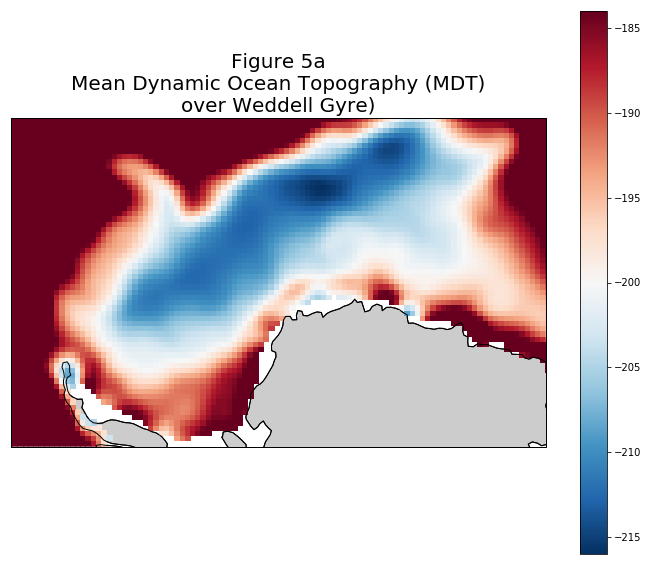

In [15]:
#missing contour lines and 1km isobath line
#How to add thick, black line of 1km isobath?
#How to fix colorbar size
extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

mdt_cs = ax.pcolormesh(ds.Longitude, ds.Latitude, ds.MDT, transform=ccrs.PlateCarree(), cmap='RdBu_r', 
                                                                                        vmin=-216, vmax=-184)
ax.contour(ds.Longitude, ds.Latitude, ds.MDT, levels=20, colors='k')
plt.colorbar(mdt_cs)
plt.title('Figure 5a\nMean Dynamic Ocean Topography (MDT)\nover Weddell Gyre)', fontsize=20)

>**Figure 5a).** Seasonal variability of the Weddell Gyre: the mean dynamic ocean topography (cm) over the period of 2011-2016, the color scale is purposefully saturated to highlight the Weddell Gyre. There is a dip in the cyclonic gyre.

In [14]:
#ds.variables

In [16]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

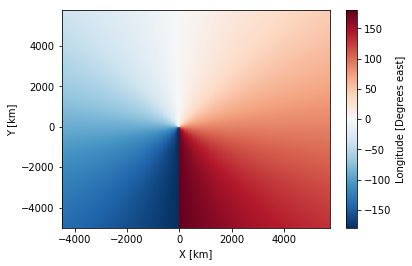

In [16]:
ds.Longitude.plot()

#Lon, Lat are 2D variables, don't really worry about them being variables in this case
ds.assign_coords(ds.Longitude)

ds.Longitude.sel([-78,20], method='nearest')

In [21]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

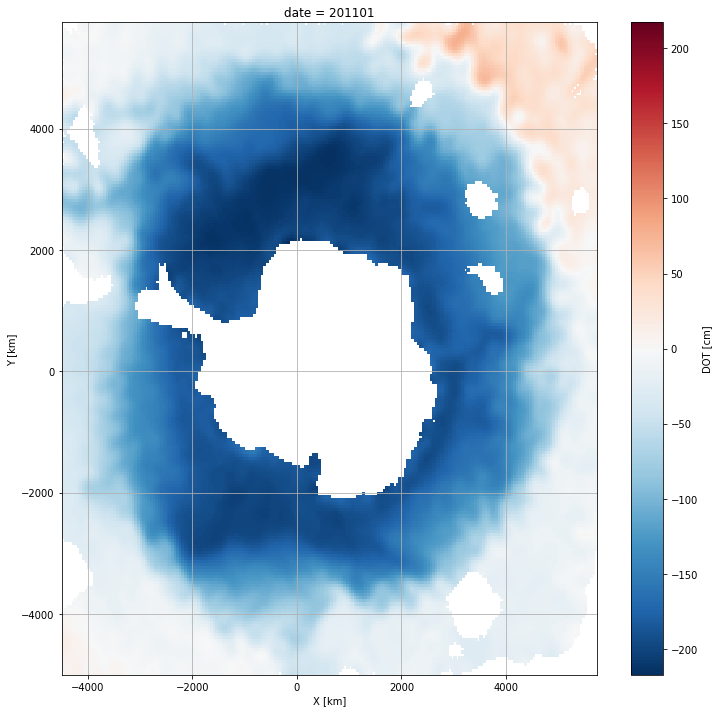

In [17]:
ds.DOT[0].plot(figsize=(12,12))
plt.grid()

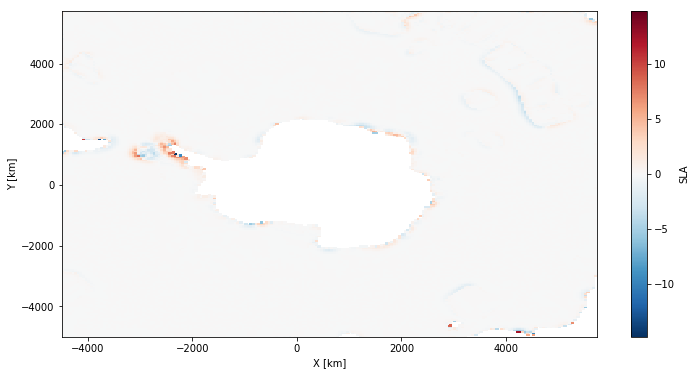

In [18]:
ds.SLA.mean(dim='date').plot(figsize=(12,6))

## Figure 6b)

### Calculating Wind Curl (not windstress curl)

In [40]:
u10 = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERAInterim/.monthly/.Surface/.u10.nc/.u10/dods'
v10 = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERAInterim/.monthly/.Surface/.v10.nc/.v10/dods'


ds_10_orig = xr.open_dataset(u10, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})
ds_10_orig['v10'] = xr.open_dataset(v10, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})['v10']

#fixing time
def fix_calendar(ds_10_orig, timevar='time'):
    if ds_10_orig[timevar].attrs['calendar'] == '360':
        ds_10_orig[timevar].attrs['calendar'] = '360_day'
    return ds_10_orig

ds_10_orig = fix_calendar(ds_10_orig)
ds_10_orig = xr.decode_cf(ds_10_orig)

#fixing lon
ds1 = ds_10_orig.roll(lon=-181).copy()
ds2 = ds1.drop('lon')
lon = ds1.lon.data
lon[lon>180.] -= 360.
ds2.coords['lon'] = ('lon', lon)
ds_10 = ds2
ds_10.lon

<xarray.DataArray 'lon' (lon: 360)>
array([-179., -178., -177., ...,  178.,  179.,  180.], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 -173.0 ...

In [41]:
ds_10

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 468)
Coordinates:
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 85.0 84.0 83.0 82.0 81.0 ...
  * time     (time) datetime64[ns] 1979-01-16 1979-02-16 1979-03-16 ...
  * lon      (lon) float32 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 -173.0 ...
Data variables:
    u10      (time, lat, lon) float32 0.9557618 0.96134233 0.96652424 ...
    v10      (time, lat, lon) float32 0.25627005 0.23519765 0.21493575 ...
Attributes:
    Conventions:  IRIDL

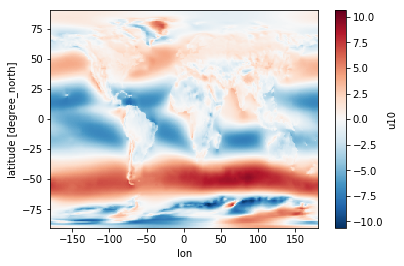

In [42]:
ds_10.u10.mean(dim='time').plot()

$$
wind\ curl\ = \bigtriangledown \times (|\mathbf{u_{10}}|\mathbf{u_{10}})
$$

By component form, it breaks down to just:
$$
= -\frac{\delta{u_{10}}}{\delta{y}} |\mathbf{u_{10}}|
$$

In [43]:
#only need -du/dy for the laplace
#calculating meters per latitudinal degree
earth_circumference = 2*np.pi*6.371e6
meters_per_degree = earth_circumference / 360
meters_per_degree

111194.92664455873

In [44]:
delta_lat = ds_10.lat.diff('lat')
#delta_lat

In [45]:
#converting lat from degrees to meters
delta_y = delta_lat * meters_per_degree
#delta_y

In [51]:
delta_lon = ds_10.lat.diff('lon')
#delta_lon

In [53]:
delta_x = delta_lon * meters_per_degree * np.cos(np.deg2rad(ds_10.lon))
#delta_x

In [46]:
delta_u = ds_10.u10.diff(dim='lat')
delta_u

<xarray.DataArray 'u10' (time: 468, lat: 180, lon: 360)>
array([[[-0.382265, -0.381866, ..., -0.380272, -0.383062],
        [-0.905637, -0.898462, ..., -0.913609, -0.912413],
        ...,
        [ 2.77431 ,  2.760359, ...,  2.787863,  2.78866 ],
        [ 1.0308  ,  1.026016, ...,  1.038373,  1.035982]],

       [[ 0.095666,  0.099652, ...,  0.092078,  0.091281],
        [ 0.218038,  0.224416, ...,  0.202094,  0.211661],
        ...,
        [ 3.05493 ,  3.031811, ...,  3.088812,  3.077252],
        [ 1.380379,  1.368421, ...,  1.402701,  1.393533]],

       ...,

       [[-0.359897, -0.359073, ..., -0.358661, -0.361132],
        [-0.644026, -0.644849, ..., -0.640731, -0.64279 ],
        ...,
        [ 3.326368,  3.335839, ...,  3.284366,  3.316485],
        [ 1.616241,  1.624477, ...,  1.611711,  1.608417]],

       [[-0.170066, -0.156889, ..., -0.169654, -0.181595],
        [-0.341366, -0.342602, ..., -0.344249, -0.340543],
        ...,
        [ 2.68646 ,  2.669989, ...,  2.694695,

In [55]:
delta_v = ds_10.v10.diff(dim='lon')
#delta_v

In [59]:
#absolute value of wind
u10_abs = np.absolute(ds_10.u10)
u10_abs

<xarray.DataArray 'u10' (time: 468, lat: 181, lon: 360)>
array([[[0.955762, 0.961342, ..., 0.940615, 0.95058 ],
        [0.573497, 0.579476, ..., 0.560343, 0.567518],
        ...,
        [0.172498, 0.132637, ..., 0.251422, 0.212757],
        [1.203297, 1.158653, ..., 1.289795, 1.248739]],

       [[1.177786, 1.178185, ..., 1.170213, 1.177786],
        [1.273452, 1.277837, ..., 1.262291, 1.269068],
        ...,
        [0.675541, 0.66996 , ..., 0.68431 , 0.680324],
        [2.055919, 2.038381, ..., 2.087011, 2.073857]],

       ...,

       [[0.855979, 0.855979, ..., 0.850626, 0.856391],
        [0.496082, 0.496906, ..., 0.491965, 0.495259],
        ...,
        [2.94682 , 3.007763, ..., 2.818756, 2.885876],
        [1.330579, 1.383287, ..., 1.207044, 1.277459]],

       [[5.46628 , 5.431279, ..., 5.497576, 5.500458],
        [5.296215, 5.27439 , ..., 5.327922, 5.318863],
        ...,
        [1.618002, 1.669886, ..., 1.510527, 1.565706],
        [0.2373  , 0.28589 , ..., 0.132296, 0.1

In [61]:
wind_curl = ((delta_v / delta_x) * v10_abs) - ((delta_u / delta_y) * u10_abs)
wind_curl

<xarray.DataArray (time: 468, lat: 180, lon: 359)>
array([[[-1.989745e-06, -2.006099e-06, ..., -1.915952e-06, -1.954751e-06],
        [-2.577485e-06, -2.451473e-06, ..., -2.902631e-06, -2.830155e-06],
        ...,
        [ 3.298761e-06,  2.297920e-06, ...,  6.311026e-06,  5.343336e-06],
        [ 1.069652e-05,  1.022114e-05, ...,  1.205326e-05,  1.164296e-05]],

       [[ 1.145489e-06,  1.199910e-06, ...,  1.045782e-06,  1.042226e-06],
        [ 3.033742e-06,  3.148359e-06, ...,  2.663377e-06,  2.820361e-06],
        ...,
        [ 1.827312e-05,  1.800680e-05, ...,  1.901457e-05,  1.883321e-05],
        [ 2.509069e-05,  2.464303e-05, ...,  2.633163e-05,  2.599468e-05]],

       ...,

       [[-1.604138e-06, -1.602530e-06, ..., -1.586471e-06, -1.608077e-06],
        [-8.574341e-07, -8.590255e-07, ..., -8.567257e-07, -8.523505e-07],
        ...,
        [ 9.021597e-05,  9.234210e-05, ...,  8.324366e-05,  8.605969e-05],
        [ 2.019595e-05,  2.108394e-05, ...,  1.748983e-05,  1.847263

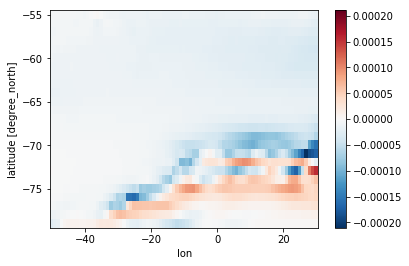

In [64]:
wind_curl.sel(lon=slice(-50,30), lat=slice(-55, -79)).mean('time').plot()

In [67]:
wind_curl.sel(time=slice('2011','2016')).mean(['lat', 'lon']).plot()

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f63a0d80d08> (for post_execute):


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

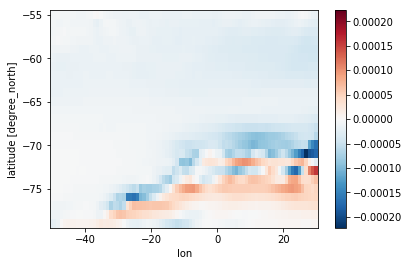

In [28]:
weddell_wind_curl = wind_curl.sel(lon=slice(-50,30), lat=slice(-55, -79), time=slice('2011','2016'))
weddell_wind_curl.mean('time').plot()

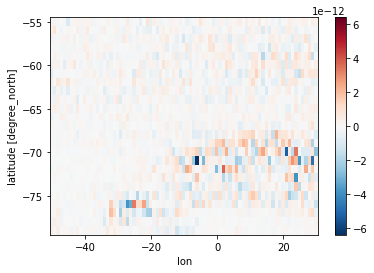

In [29]:
#taking out monthly mean to take out seasonal cycle
weddell_season_out = weddell_wind_curl.groupby('time.month') - (weddell_wind_curl.groupby('time.month')
                                                                                 .mean(dim='time'))
weddell_season_out.mean('time').plot()

Text(0.5,1,'Figure 6b)')

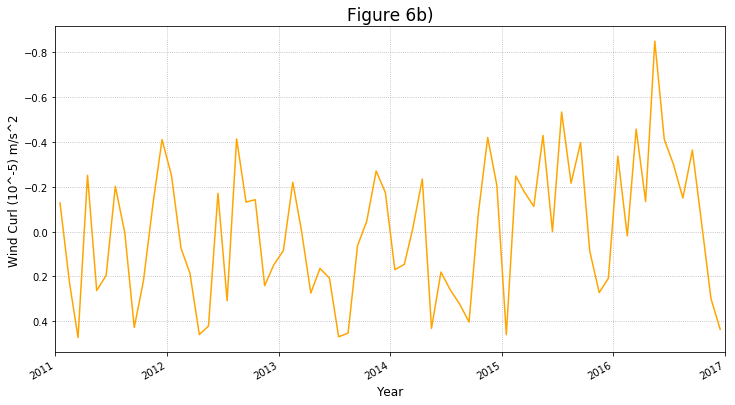

In [30]:
(weddell_season_out*1e5).mean(['lat','lon']).plot(figsize=(12,6), c='orange')
plt.grid(linestyle='dotted')
plt.ylabel('Wind Curl (10^-5) m/s^2', fontsize=12)
plt.gca().invert_yaxis()
plt.xlim(xmin='2011', xmax='2017')
plt.xlabel('Year', fontsize=12)
plt.title('Figure 6b)', fontsize=17, fontweight=20)

**Figure 6b).** The nonseasonal wind curl(10e-5 m/s2) for Weddell Gyre. 
>This figure is meant to have nonseasonal Gyre depth superimposed so that we can see role of wind forcing on gyre depth variability. The paper uses the wind curl instead of the windstress curl  as surface atmospheric forcing metric in order to "isolate the influence of wind variability in a region where the surface drag coefficient is heavily modified by the presence of sea ice in ways that may not be well-represented in reanalyses".

## Fig 7a)
Average over seasons: summer-(JFM), **autumn-(AMJ)**, winter-(JAS), **spring-(OND)**

In [31]:
ds.SLA
# there are more than one X,Y pts for each date
# there are 10 less X values than Y

<xarray.DataArray 'SLA' (date: 72, Y: 215, X: 205)>
[3173400 values with dtype=float32]
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [33]:
ds.SLA.date

<xarray.DataArray 'date' (date: 72)>
array([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206,
       201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303,
       201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409,
       201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506,
       201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603,
       201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612],
      dtype=int32)
Coordinates:
  * date     (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
Attributes:
    units:    YYYYMM

### Calculating Gyre Depth

In [36]:
mean_DOT = ds.DOT.mean()
mean_DOT

<xarray.DataArray 'DOT' ()>
array(-91.366188)

In [37]:
gyre_depth = SLA_light_blue - SLA_dark_blue

NameError: name 'SLA_light_blue' is not defined

In [ ]:
#Do we calculate f with ds.Latitude or ds.Y? I think ds.Latitude
g = 9.81 #m/s-2
omega = 7.2921159e-5 #rad/sec
f = 2*omega*np.sin(ds.Latitude) #s-1

In [ ]:
del_x = 
del_y = 
lap_H = [del_delx, del_dely, 0]

## Figure 7b)

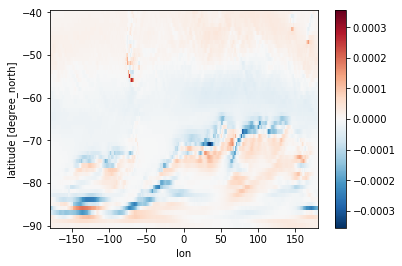

In [32]:
aa_wind_curl = wind_curl.sel(lon=slice(-179,180), lat=slice(-40, -90), time=slice('2011','2016'))
aa_wind_curl.mean('time').plot()

Text(0.5,1,'Antarctic Wind Curl')

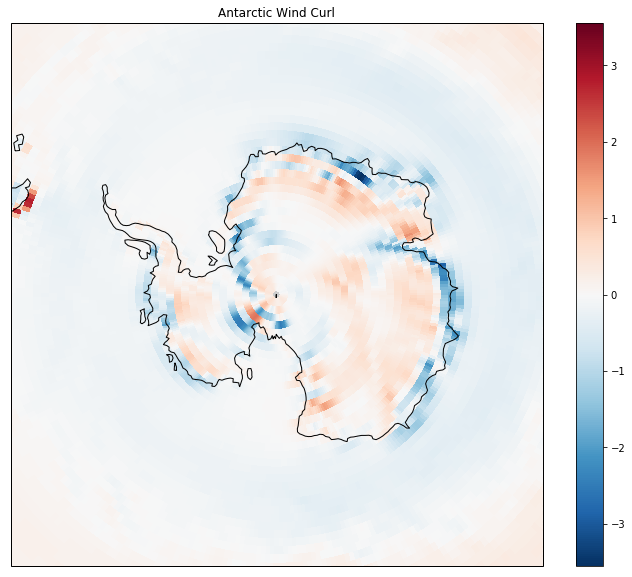

In [33]:
extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))
central_lon = np.mean(extent[:2])

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

(aa_wind_curl*1e4).mean('time').plot(transform=ccrs.PlateCarree(central_longitude=central_lon), cmap='RdBu_r');
plt.title('Antarctic Wind Curl')

## Figure 10 a)

In [40]:
ds.SLA

<xarray.DataArray 'SLA' (date: 72, Y: 215, X: 205)>
array([[[      nan, -3.29174 , ...,       nan,       nan],
        [-3.469368, -2.889778, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan, -3.646484, ...,       nan,       nan],
        ...,
        [      nan,  4.681908, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [-2.658859, -2.367737, ...,       nan,       nan],
        ...,
        [      nan, -1.910904, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,  0.415253, ...,       nan,       nan],
        ...,
        [      nan, -6.129494, ...,       nan,     

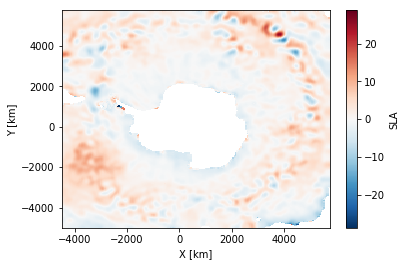

In [36]:
nino = ds.SLA.sel(date=slice('201506','201604')).mean(dim='date')
nino.plot()

NameError: name 'nino' is not defined

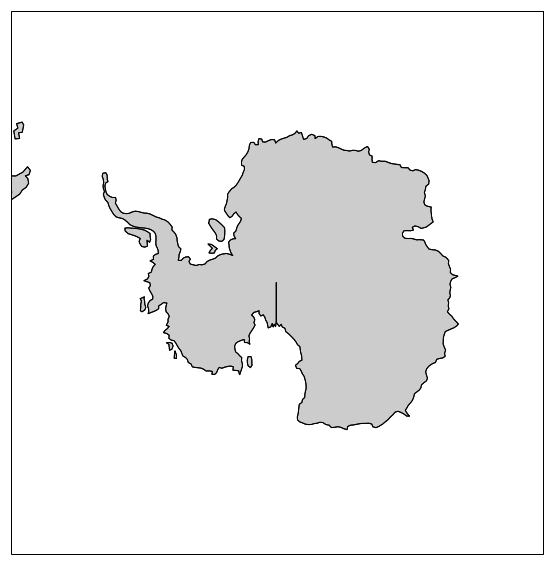

In [34]:
#having trouble plotting contours once again

extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

CS=nino.plot.pcolormesh(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-10, vmax=10)
#nino.plot.contour(x='Longitude', y='Latitude', levels=20)
#plt.colorbar(CS)
#plt.show()
plt.title('Figure 10a)\nEl Nino SLA (cm)', fontsize=18)

Text(0.5,1,'Figure 10a)\nEl Nino SLA (cm)')

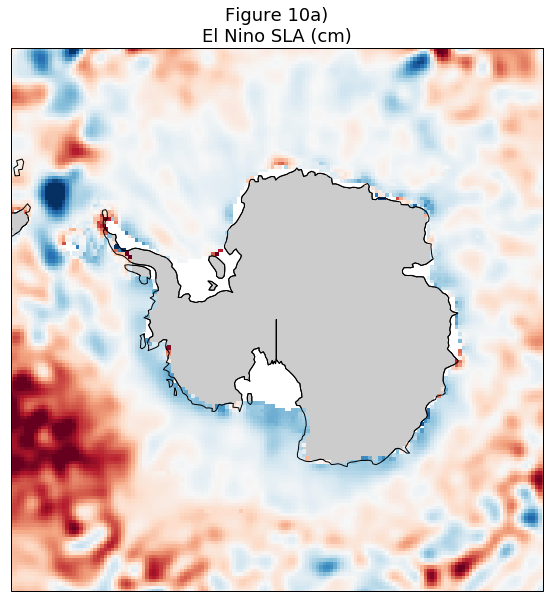

In [39]:
#having trouble plotting contours once again

extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.pcolormesh(nino.Longitude,nino.Latitude, nino, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-10, vmax=10,)
#nino.plot.contour(x='Longitude', y='Latitude', levels=20)
#plt.colorbar()
#plt.show()
plt.title('Figure 10a)\nEl Nino SLA (cm)', fontsize=18)

> **Figure 10a).** June 2015 to April 2016 time-mean sea level anomaly (cm).

Geostrophic Current:
$$
\mathbf{u_g} = \frac{f}{g}( \mathbf{\hat{k}} \times \nabla_{H}H_{DOT})
$$

where the dynamic ocean topography (DOT) 
is the SSH relative to the geoid:

$$
H_{DOT} = H_{SSH} - H_{geoid} = A-(R+\sum{H_{CORR}}) - H_{geoid}
$$

In [ ]:
! wget http://kage.ldeo.columbia.edu/data/ERA-1deg/taux-ERA.nc
! wget http://kage.ldeo.columbia.edu/data/ERA-1deg/tauy-ERA.nc